In [16]:
import pandas as pd
import re

import src.process as process
import src.explore as explore

### Import and Check Raw Dataset

In [2]:
start_yr = 2016
end_yr = 2020
path_blueprint = r'raw\data_{}.xlsx'
raw_data = process.merge_import_from_xlsx(start_yr, end_yr, path_blueprint)

##### Duplicates

In [3]:
raw_data.shape, raw_data.drop_duplicates(subset = 'Zweck').shape

((49773, 8), (24946, 8))

##### Imbalance and Class Instances

In [11]:
cat_dist = raw_data.groupby('Politikbereich').count().sort_values(by = ['Zweck'], axis = 0, ascending  = False)
pd.DataFrame(cat_dist['Zweck'])

,Zweck
Politikbereich,
Arbeit,11442
Wirtschaft,8312
Sport,5561
Jugend,4276
Kultur,3733
Soziales,2783
Gesundheit,2338
Bildung,1896
Integration,1537


<AxesSubplot:xlabel='Politikbereich'>

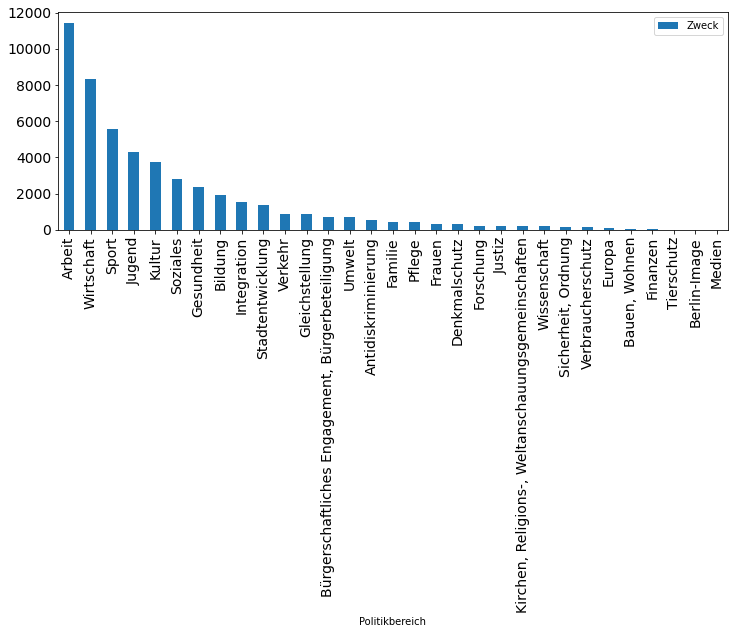

In [4]:
explore.class_frequency(raw_data)

### Remove Duplicates and Split Dataset

In [12]:
data = process.select_clean_data(raw_data, min_instances = 50)
train_data, test_data = process.stratified_train_test_split(data)

### Text Preprocessing

##### A) Simple sentence split

<AxesSubplot:title={'center':'Wortfrequenz im Politikbereich "Arbeit"'}, xlabel='Wort'>

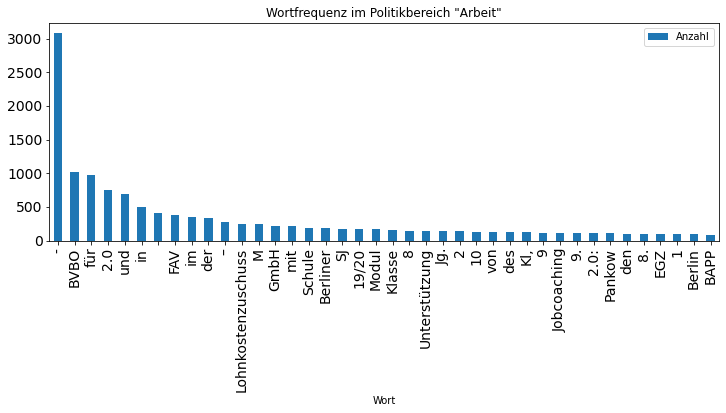

In [14]:
split_data = train_data.copy()
split_data['Zweck'] = split_data['Zweck'].apply(lambda row: list(row.split(" ")) )
explore.word_frequency(split_data, category = 'Arbeit')

##### B) Removal of Numbers & Special Characters

<AxesSubplot:title={'center':'Wortfrequenz im Politikbereich "Arbeit"'}, xlabel='Wort'>

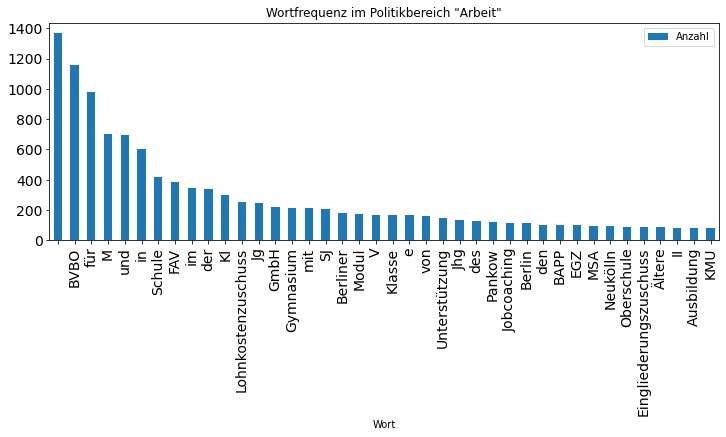

In [18]:
alpha_data = train_data.copy()
alpha_data['Zweck'] = alpha_data['Zweck'].str.replace('[^a-zA-ZÀ-ʸ ]', ' ', regex = True)
alpha_data['Zweck'] = alpha_data['Zweck'].apply(lambda row: list(re.split(" +", row)))
explore.word_frequency(alpha_data, category = 'Arbeit')

##### C) Removal of Stopwords

<AxesSubplot:title={'center':'Wortfrequenz im Politikbereich "Arbeit"'}, xlabel='Wort'>

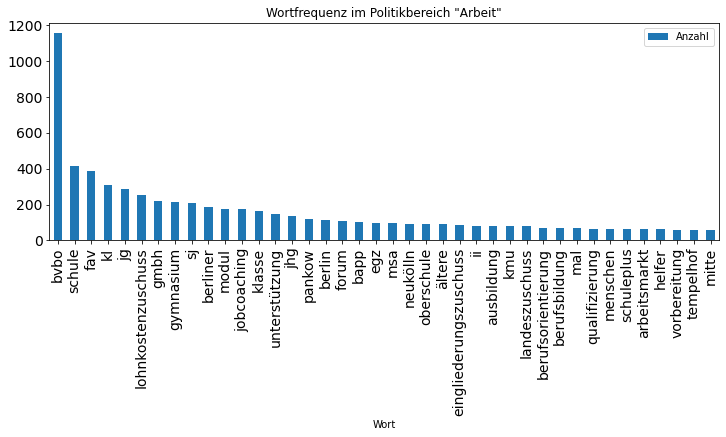

In [19]:
tokenized_data = process.tokenize(train_data)
explore.word_frequency(tokenized_data, category = 'Arbeit')

##### D) Introduction of Lemmatization

In [20]:
import spacy
nlp = spacy.load('de_core_news_md')

In [21]:
lemmatized_data = tokenized_data.copy()
lemmatized_data['Zweck'] = lemmatized_data['Zweck'].str.join(" ")
lemmatized_data['Zweck'] = lemmatized_data['Zweck'].apply(lambda row: [str(x) for x in nlp.tokenizer(row)])

<AxesSubplot:title={'center':'Wortfrequenz im Politikbereich "Arbeit"'}, xlabel='Wort'>

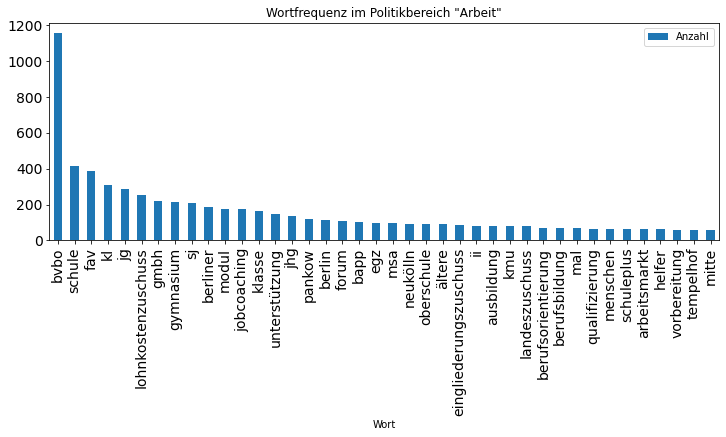

In [22]:
explore.word_frequency(lemmatized_data, category = 'Arbeit')